# Creating the Bathymetry

Name: Mike Wood

Date: 10/22/24

In this notebook, I describe the creation of the bathymetry file I will use in my model.

First, import packages to re-create and visualize the model grid here:

### Bathymetry Source File
To generate the bathymetry for my model, I first obtained a subset of the global GEBCO bathymetry grid from here: https://download.gebco.net/

Specifically, I requested a subset covering my grid ranging from 136-114$^{\circ}$W in longitude and 28-54$^{\circ}$N in latitude, and I stored the bathymetry as `GEBCO_Bathymetry_California.nc`.

### Interpolating Bathymetry onto the Model Domain
Next, I use an interpolation function to interpolate the GEBCO Bathymetry onto the domain of my model.

In [14]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import netCDF4 as nc4

In [15]:
# read in the bathymetry grid
file_path = '/Users/mike/Documents/Teaching/Courses/CS 185C/Project/California Upwelling/GEBCO_Bathymetry_California.nc'
ds = nc4.Dataset(file_path)
gebco_lon = ds.variables['lon'][:]
gebco_lat = ds.variables['lat'][:]
Gebco_bathy = ds.variables['elevation'][:]
ds.close()

# create a meshgrid of the lon and lat
Gebco_Lon, Gebco_Lat = np.meshgrid(gebco_lon, gebco_lat)

In [16]:
# recreate the model grid - see previous notebook on creating the model grid for details
delX = 1/12
delY = 1/16
xgOrigin = -135
ygOrigin = 29
n_rows = 360
n_cols = 240

xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

In [17]:
# interpolate the gebco data onto the model grid
Model_bathy = griddata(np.column_stack([Gebco_Lon.ravel(),Gebco_Lat.ravel()]), Gebco_bathy.ravel(), (XC, YC), method='nearest')

In [18]:
# set points on land to 0
Model_bathy[Model_bathy>0] = 0

### Visualizing the Bathymetry Grid
Finally, I create a plot of the bathymetry and compare with the source data to ensure everything turns out as expected:

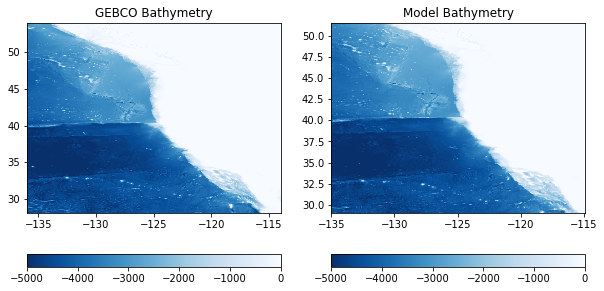

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(Gebco_Lon, Gebco_Lat, Gebco_bathy, vmin=-5000, vmax=0, cmap='Blues_r')
plt.colorbar(C, orientation = 'horizontal')
plt.title('GEBCO Bathymetry')

plt.subplot(1,2,2)
C = plt.pcolormesh(XC, YC, Model_bathy, vmin=-5000, vmax=0, cmap='Blues_r')
plt.colorbar(C, orientation = 'horizontal')
plt.title('Model Bathymetry')

plt.show()

### Checking for isolated regions
One potential problem that can be encountered in ocean models occurs with isolated regions

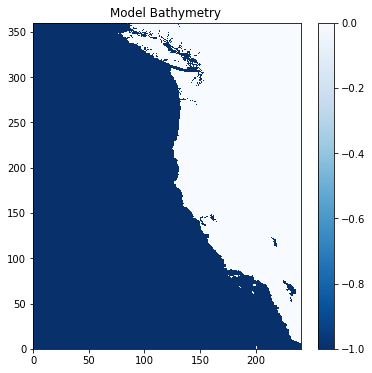

In [21]:
plt.figure(figsize=(6,6))

C = plt.pcolormesh(Model_bathy, vmin=-1, vmax=0, cmap='Blues_r')
plt.colorbar(C)
plt.title('Model Bathymetry ')

plt.show()

As we can see, there are several isolated regions includes the San Francisco Bayand the Salton Sea. In addition, there is an area of extreme detail in the area of British Columbia, Canada. Before proceeding with the model, there regions need to be addressed.